# Pymaceuticals Inc.
---

### Analysis

The purpose of this analysis was to analyze a clinical study using mice  that was comparing The performance of Pymaceuticals’ drug of interest, Capomulin, against other treatment regimens. In order to satisfy this request, the data that was generated was analyzed in various ways.

First the data was cleaned to make sure that there were no duplicate entries for the mice that were tested.  Data from one mouse was removed from the dataset.

Next, a summary of basic statistics regarding tumor size (by volume in mm3) was generated.  This included the mean, median, variance, standard deviation and standard error of the volume data.  This data at a glance shows that Capomulin and Ramicane both had the smallest average volume, median and standard deviation relative to the other drugs that were tested.  This then allowed for a deeper dive into these two drugs along with two others.

A comparison  using a bar graph  of treatment vs. timepoints) showed that the most data points were gathered for  Capomulin and Ramicane.  A pie chart was used to show the distribution of male vs. female mice used in the study which showed an equal percentage of each were used.

Four drugs were analyzed deeper.  These drugs included: Capomulin, Ramicane, Infubinol, and Ceftamin.
The analysis specifically included how the drugs affected tumor volume (mm3).  A boxplot was used to show error bars based on quartiles as well as outliers comparing the data for these drugs relative to tumor volume.  One outlier was found for Inbubinol.  The data also showed overlap in the error bars of all except Ramicane.  Both Capomulin and Ramicane showed a smaller volume compared to the other two.

Lastly there were two plots for Capomulin, a line graph and a scatter plot.  The line graph showed how the drug affected the tumor volume (mm3) over time for a specific mouse.  This analysis shows that over the 45 days there was a decrease in the tumor volume starting at day 20 of treatment.  The scatter plot showed the correlation between mouse weight and average tumor volume.  The result of this demonstrates that generally the heavier the mouse is, the greater the average tumor volume is.  A correlation coefficient resulted in a correlation of 0.84 and the slope of the linear regression line is positive. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
count = mouse_study_complete[["Mouse ID"]].nunique()
print(count)

Mouse ID    249
dtype: int64


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplic1 = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID", "Timepoint"])]
print(duplic1['Mouse ID'].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Get list Of duplicate rows using multiple columns

duplic2 = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989"]
# https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplic2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete2 = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] != "g989"]
mouse_study_complete2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
count = mouse_study_complete2[["Mouse ID"]].nunique()
print(count)

Mouse ID    248
dtype: int64


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Create reuced dataframe with just drug regimen and tumor volume
mouse_study_stats = mouse_study_complete2.loc[:,["Drug Regimen","Tumor Volume (mm3)"]] 
mouse_study_stats = mouse_study_stats.set_index(list(mouse_study_stats)[0])

#stats
mean = mouse_study_stats.groupby(["Drug Regimen"]).mean()
mean= mean.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

median = mouse_study_stats.groupby(["Drug Regimen"]).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})

variance = mouse_study_stats.groupby(["Drug Regimen"]).var()
variance = variance.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})

stdev = mouse_study_stats.groupby(["Drug Regimen"]).var()
stdev = stdev.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})

SEM = mouse_study_stats.groupby(["Drug Regimen"]).sem()
SEM = SEM.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

# Merging mini-dataframes
mouse_study_stats_sum = pd.merge(mean, median, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, variance, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, stdev, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, SEM, how = "left", on = ["Drug Regimen"])

mouse_study_stats_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Worked on this for a bit but decided not to.


## Bar and Pie Charts

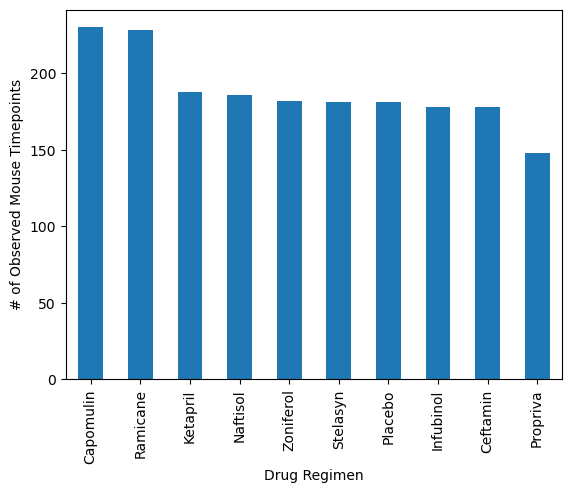

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# count the number of rows for each drug regimen and put into a dataframe
drug_timept = pd.DataFrame(mouse_study_complete2["Drug Regimen"].value_counts())
drug_timept.rename(columns={"Drug Regimen": "# of Timepoints"}, inplace = True)
drug_timept.index.name = "Drug Regimen"

# Use DataFrame.plot() in order to create a bar chart of the data
drug_timept.plot(kind="bar", width= 0.5, legend=False)
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

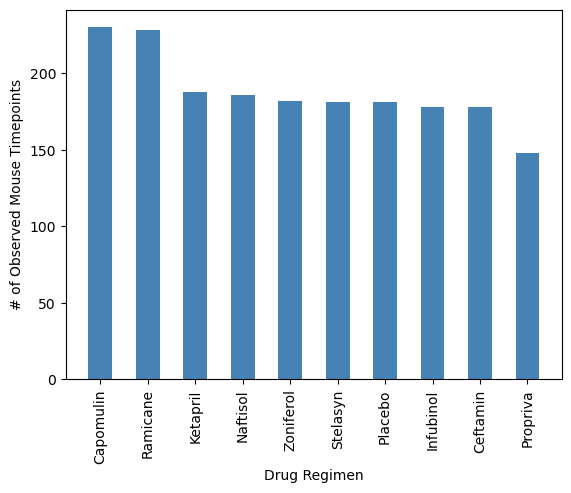

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each drug regimen and put into a dataframe
drug_timept2 = pd.DataFrame(mouse_study_complete2["Drug Regimen"].value_counts())
drug_timept2.rename(columns={"Drug Regimen": "# of Timepoints"}, inplace = True)
drug_timept2.index.name = "Drug Regimen"
# drug_timept2

# Set x axis and tick locations
x_axis = np.arange(len(drug_timept2.index))
tick_locations = [value for value in x_axis]

# Create plot
plt.bar(x_axis, drug_timept2["# of Timepoints"], color='steelblue', alpha=1, align="center",width=0.5)
plt.xticks(tick_locations, drug_timept2.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


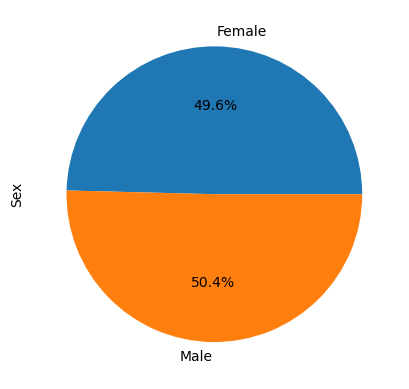

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filter the DataFrame down only to those columns to chart and rename columns
sex_df = mouse_study_complete2[["Mouse ID","Sex"]]

# Remove redundant Mouse ID
sex_df = sex_df.drop_duplicates(subset=["Mouse ID"])

# Count the number of males vs. females
sex_df2 = sex_df.groupby("Sex").count()

# Renaming headers in df
sex_df2.index.name = None
sex_df2.rename(columns={"Mouse ID": "Sex"}, inplace = True)

# Create plot
sex_df2.plot(kind='pie', subplots=True, autopct='%1.1f%%', legend = False)
plt.show()

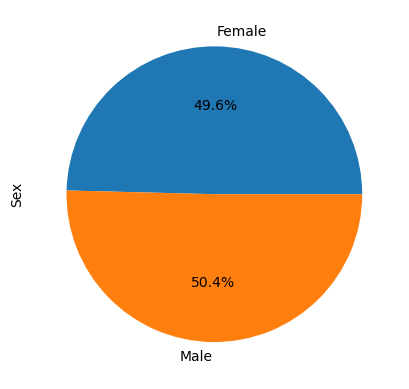

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_df2["Sex"], autopct="%1.1f%%", labels=sex_df2.index)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
f_tumor_volgr =  mouse_study_complete2.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
f_tumor_volgr = pd.DataFrame(f_tumor_volgr)
# f_tumor_volgr

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
f_tumor_mrg = pd.merge(f_tumor_volgr, mouse_study_complete2, how="left", on=["Timepoint", "Timepoint"])
f_tumor_mrg = pd.merge(f_tumor_volgr, mouse_study_complete2, on=["Mouse ID", "Timepoint"]).loc[:,["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]] 
f_tumor_mrg

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [14]:
# decrease the df to just the drugs of interest: treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
  
# Selecting rows based on condition
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
red_treatments = f_tumor_mrg[f_tumor_mrg["Drug Regimen"].isin(treatments)]
red_treatments

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
194,Ramicane,s508,45,30.276232
195,Ramicane,u196,45,40.667713
196,Ramicane,w678,5,43.166373
197,Ramicane,y449,15,44.183451


In [15]:
# Resetting Index and removing extra columns
# red_treatind = red_treatments.set_index("Drug Regimen")
red_treatind = red_treatments
red_treatind = red_treatind.drop(columns=['Mouse ID', 'Timepoint'])

red_treatind

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
1,Capomulin,38.939633
2,Capomulin,30.485985
3,Capomulin,37.074024
4,Capomulin,40.159220
...,...,...
194,Ramicane,30.276232
195,Ramicane,40.667713
196,Ramicane,43.166373
197,Ramicane,44.183451


In [16]:
# Determine outliers using upper and lower bounds

# Sort df to id outliers
tempdfsrt = red_treatind.sort_values(by=["Drug Regimen",'Tumor Volume (mm3)'])

# Create empty dataframe to add data to for graphing
vol = pd.DataFrame()

# identify treatments to analyze
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for t in range(len(treatments)):
    treatment = treatments[t]
     
    # Create a temp df for just one drug treatment
    onedrug = tempdfsrt.loc[tempdfsrt["Drug Regimen"] == treatment]
    onedrug = onedrug.reset_index()
    onedrug = onedrug.drop(columns=['index'])
        
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = onedrug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
        
    for s in range(len(onedrug['Tumor Volume (mm3)'])):
        outlier = onedrug[(onedrug['Tumor Volume (mm3)'] < lower_bound) | (tempdfsrt['Tumor Volume (mm3)'] > upper_bound)]
        
    print(f"{treatment}'s potential outliers: {outlier}")    

    # saving values for next input
    vol[treatment] = onedrug.iloc[:,1]
    

C:\Users\Aleid van der Zel\AppData\Local\Temp\ipykernel_7860\630351054.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier = onedrug[(onedrug['Tumor Volume (mm3)'] < lower_bound) | (tempdfsrt['Tumor Volume (mm3)'] > upper_bound)]
C:\Users\Aleid van der Zel\AppData\Local\Temp\ipykernel_7860\630351054.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier = onedrug[(onedrug['Tumor Volume (mm3)'] < lower_bound) | (tempdfsrt['Tumor Volume (mm3)'] > upper_bound)]
C:\Users\Aleid van der Zel\AppData\Local\Temp\ipykernel_7860\630351054.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier = onedrug[(onedrug['Tumor Volume (mm3)'] < lower_bound) | (tempdfsrt['Tumor Volume (mm3)'] > upper_bound)]
C:\Users\Aleid van der Zel\AppData\Local\Temp\ipykernel_7860\630351054.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier = onedrug[(onedrug['Tum

Capomulin's potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
Infubinol's potential outliers:   Drug Regimen  Tumor Volume (mm3)
0    Infubinol           36.321346
Ceftamin's potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


In [17]:
# Print df just to make sure it worked.
vol

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,36.321346,45.000000
1,28.430964,29.128472,45.699331,45.000000
2,28.484033,30.276232,46.250112,45.000000
3,30.485985,30.564625,47.010364,45.000000
4,31.023923,30.638696,50.005138,46.784535
5,31.896238,31.095335,51.542431,47.784682
6,32.377357,31.560470,54.048608,48.722078
7,33.329098,32.978522,54.656549,52.925348
8,34.455298,33.397653,55.629428,55.742829
9,36.041047,33.562402,55.650681,56.057749


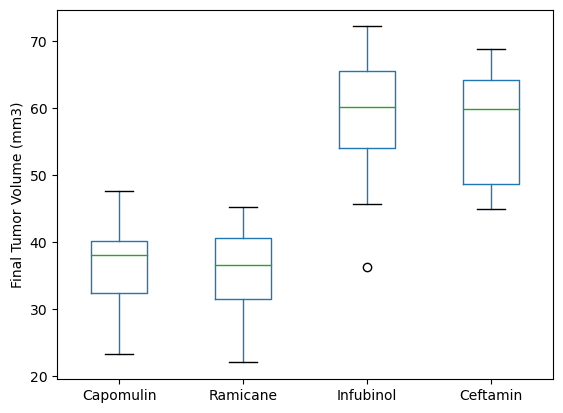

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# SEE the next one done by pyplot for changing color for outlier.  Did not find option for pandas plot

data = vol.boxplot(column = ['Capomulin','Ramicane', 'Infubinol','Ceftamin'], ylabel = "Final Tumor Volume (mm3)", grid=False)
plt.show()



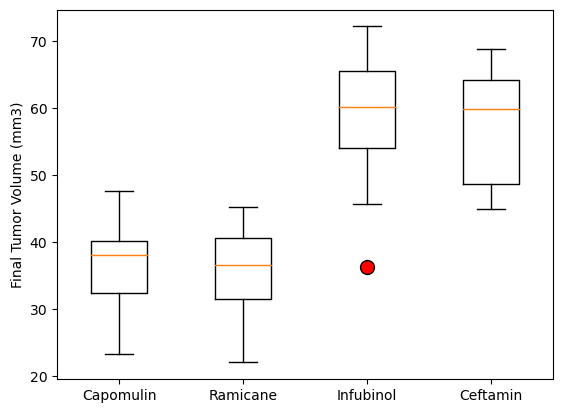

In [19]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
labels = ("Capomulin","Ramicane", "Infubinol","Ceftamin")
Capomulin = vol["Capomulin"]
Ramicane = vol["Ramicane"]
Infubinol = vol["Infubinol"]
Ceftamin = vol["Ceftamin"]

data = [Capomulin, Ramicane, Infubinol, Ceftamin ]
ax1.boxplot(data, labels=labels, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})

plt.show()

## Line and Scatter Plots

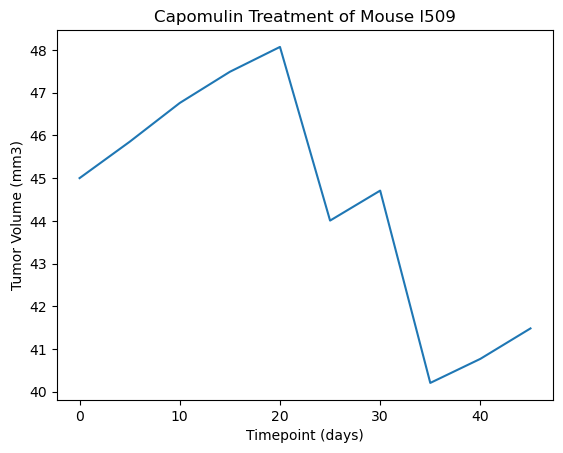

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulindf = mouse_study_complete2[mouse_study_complete2["Drug Regimen"]=="Capomulin"]
single_mouse = capomulindf[capomulindf["Mouse ID"] == "l509"]
# single_mouse

plt.plot(single_mouse["Timepoint"],single_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

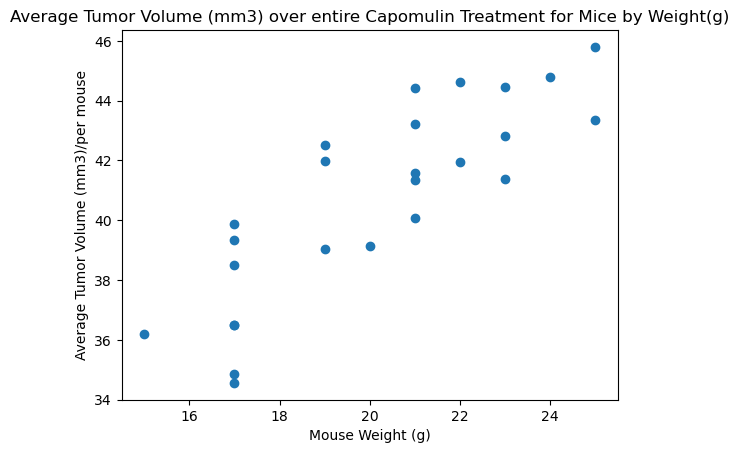

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulindf = mouse_study_complete2[mouse_study_complete2["Drug Regimen"]=="Capomulin"]
# capomulindf

weightdf = capomulindf.loc[:,["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
weightvolmean = weightdf.groupby(["Mouse ID"]).mean()
weightvolmean.reset_index(inplace=True)
# weightvolmean

plt.scatter(weightvolmean["Weight (g)"],weightvolmean["Tumor Volume (mm3)"], marker="o")
plt.title("Average Tumor Volume (mm3) over entire Capomulin Treatment for Mice by Weight(g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)/per mouse")
plt.show()


## Correlation and Regression

The correlation between mouse weight (g) and average tumor volume (mm3) is 0.84


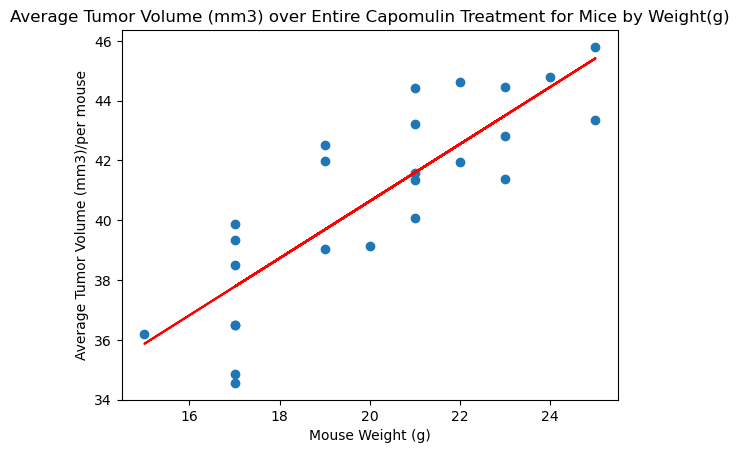

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation Coefficient
mouse_weight = weightvolmean.iloc[:,1]
ave_vol = weightvolmean.iloc[:,2]
correlation = st.pearsonr(mouse_weight,ave_vol)
print(f"The correlation between mouse weight (g) and average tumor volume (mm3) is {round(correlation[0],2)}")

# Linear Regression
x = weightvolmean["Weight (g)"]
y = weightvolmean["Tumor Volume (mm3)"]
slope, intercept, r, p, se = linregress(x, y)
plt.scatter(x, y, marker="o")
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.title("Average Tumor Volume (mm3) over Entire Capomulin Treatment for Mice by Weight(g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)/per mouse")
plt.show()